In [ ]:
import pandas as pd
import numpy as np

from tqdm import tqdm

import yfinance as yf
from datetime import datetime, timedelta, date

import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff

In [ ]:
from plotly import offline
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
tickers = [
    'ACC.NS',
    'AUBANK.NS',
    'ABCAPITAL.NS',
    'ALKEM.NS',
    'ASHOKLEY.NS',
    'ASTRAL.NS',
    'AUROPHARMA.NS',
    'BALKRISIND.NS',
    'BANDHANBNK.NS',
    'BHARATFORG.NS',
    'BHEL.NS',
    'COFORGE.NS',
    'CONCOR.NS',
    'CUMMINSIND.NS',
    'DALBHARAT.NS',
    'DIXON.NS',
    'ESCORTS.NS',
    'FEDERALBNK.NS',
    'GMRINFRA.NS',
    'GODREJPROP.NS',
    'GUJGASLTD.NS',
    'HDFCAMC.NS',
    'HINDPETRO.NS',
    'INDHOTEL.NS',
    'INDUSTOWER.NS',
    'JUBLFOOD.NS',
    'LTTS.NS',
    'LUPIN.NS',
    'MRF.NS',
    'M&MFIN.NS',
    'MFSL.NS',
    'MAXHEALTH.NS',
    'MPHASIS.NS',
    'NMDC.NS',
    'OBEROIRLTY.NS',
    'OFSS.NS',
    'PIIND.NS',
    'PAGEIND.NS',
    'PERSISTENT.NS',
    'PETRONET.NS',
    'POLYCAB.NS',
    'SAIL.NS',
    'SUZLON.NS',
    'TATACOMM.NS',
    'TIINDIA.NS',
    'UPL.NS',
    'IDEA.NS',
    'YESBANK.NS'
]

In [ ]:
#sets end_date to today’s date and start_date to the date one year prior, both in YYYY-MM-DD format.
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=365)).strftime("%Y-%m-%d")

In [ ]:
#This function fetches key financial data (like profit margins, market cap, P/E ratio) for a list of stock tickers and returns it as a transposed DataFrame.

def fetch_stock_data(tickers):
    data = {}
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        info = stock.info
        data[ticker] = {
            'Profitability': info.get('profitMargins', 0),
            'MarketCap': info.get('marketCap', 0),
            'DebtToEquity': info.get('debtToEquity', 0),
            'P/E': info.get('trailingPE', np.nan),
            'CurrentRatio': info.get('currentRatio', 0)
        }
    return pd.DataFrame(data).T

In [ ]:
stock_data = fetch_stock_data(tickers)

In [ ]:
#new columns in the stock_data DataFrame that represent different financial scores, helping to assess the companies based on profitability, market capitalization, financial strength, and valuation.

stock_data['Profitability_Score'] = stock_data['Profitability'] * 100
stock_data['MarketCap_Score'] = np.log(stock_data['MarketCap'] + 1)
stock_data['FinancialStrength_Score'] = 1 / (stock_data['DebtToEquity'] + 1)
stock_data['Valuation_Score'] = 1 / (stock_data['P/E'] + 1)

In [ ]:
#Aggregate scores
stock_data['Total_Score'] = (
    stock_data['Profitability_Score'] +
    stock_data['MarketCap_Score'] +
    stock_data['FinancialStrength_Score'] +
    stock_data['Valuation_Score']
)

In [ ]:
#extracts the top 10 stocks with the highest Total_Score from the stock_data DataFrame. The Total_Score would typically be a composite score based on various financial metrics like profitability, market cap, etc.

top_stocks = stock_data.sort_values(by='Total_Score', ascending=False).head(10)

In [ ]:
print(top_stocks[['Total_Score']])

               Total_Score
HDFCAMC.NS       89.270313
OBEROIRLTY.NS    71.271900
GODREJPROP.NS    67.002537
OFSS.NS          63.412529
FEDERALBNK.NS    59.849368
NMDC.NS          55.045641
BANDHANBNK.NS    54.555319
M&MFIN.NS        54.389093
AUBANK.NS        51.305681
INDUSTOWER.NS    50.613259


In [ ]:
print(top_stocks)

               Profitability     MarketCap  DebtToEquity        P/E  \
HDFCAMC.NS           0.61225  1.032417e+12         1.766  46.945602   
OBEROIRLTY.NS        0.43869  7.336761e+11        18.023  33.484900   
GODREJPROP.NS        0.39470  8.864617e+11       103.668  79.145980   
OFSS.NS              0.35103  1.009613e+12         0.547  43.388443   
FEDERALBNK.NS        0.31878  4.780020e+11         0.000  11.740963   
NMDC.NS              0.27634  6.903630e+11        13.083  11.476616   
BANDHANBNK.NS        0.26989  3.194492e+11         0.000  12.079574   
M&MFIN.NS            0.27739  3.540316e+11       460.453  17.091774   
AUBANK.NS            0.23301  5.170294e+11         0.000  29.016808   
INDUSTOWER.NS        0.22880  1.029064e+12        69.195  15.851670   

               CurrentRatio  Profitability_Score  MarketCap_Score  \
HDFCAMC.NS            0.000            61.225000        27.662924   
OBEROIRLTY.NS         0.000            43.869000        27.321334   
GODREJPROP.

In [ ]:
tickers = [
    'HDFCAMC.NS', 'OBEROIRLTY.NS', 'GODREJPROP.NS',
    'OFSS.NS', 'FEDERALBNK.NS', 'NMDC.NS',
    'BANDHANBNK.NS', 'M&MFIN.NS', 'AUBANK.NS',
    'INDUSTOWER.NS'
]

In [ ]:
#This code downloads historical stock price data, calculates the daily percentage return for each stock, and prints the resulting daily returns for each stock in the given tickers list.

data = yf.download(tickers, start='2023-10-12', end='2024-10-12')

closing_prices = data['Close']

closing_prices.columns = closing_prices.columns.to_flat_index()
closing_prices.columns = [col[0] for col in closing_prices.columns]

daily_returns = closing_prices.pct_change()

daily_returns = daily_returns.dropna()

daily_returns.columns = tickers

print(daily_returns)

[*********************100%***********************]  10 of 10 completed


                           HDFCAMC.NS  OBEROIRLTY.NS  GODREJPROP.NS   OFSS.NS  \
Date                                                                            
2023-10-13 00:00:00+00:00    0.000907      -0.041036       0.000670 -0.007758   
2023-10-16 00:00:00+00:00   -0.010601       0.014126      -0.005689  0.007671   
2023-10-17 00:00:00+00:00   -0.003877      -0.018025      -0.001010  0.003733   
2023-10-18 00:00:00+00:00   -0.003043      -0.006675      -0.012466 -0.018507   
2023-10-19 00:00:00+00:00    0.000994      -0.037589       0.002047  0.001134   
...                               ...            ...            ...       ...   
2024-10-07 00:00:00+00:00    0.019542      -0.013486      -0.048898 -0.014392   
2024-10-08 00:00:00+00:00   -0.007708       0.018010       0.019327  0.033669   
2024-10-09 00:00:00+00:00   -0.030316       0.006341      -0.010226  0.010993   
2024-10-10 00:00:00+00:00   -0.007585      -0.006090      -0.000861  0.010069   
2024-10-11 00:00:00+00:00   

In [ ]:
# calculates the annualized mean returns and annualized covariances of the stocks based on their daily returns
#The annualization adjusts the data to a yearly scale, which is useful for portfolio analysis or risk assessment.
mus = (1 + daily_returns.mean()) ** 252 - 1

cov = daily_returns.cov() * 252

print("Annualized Mean Returns:")
print(mus)
print("\nAnnualized Covariances:")
print(cov)

Annualized Mean Returns:
HDFCAMC.NS       0.005621
OBEROIRLTY.NS   -0.103554
GODREJPROP.NS    0.307055
OFSS.NS          0.951643
FEDERALBNK.NS    0.721663
NMDC.NS          1.171233
BANDHANBNK.NS    0.039723
M&MFIN.NS        0.611368
AUBANK.NS        0.804291
INDUSTOWER.NS    2.237515
dtype: float64

Annualized Covariances:
               HDFCAMC.NS  OBEROIRLTY.NS  GODREJPROP.NS   OFSS.NS  \
HDFCAMC.NS       0.087040       0.027987       0.010554  0.008852   
OBEROIRLTY.NS    0.027987       0.149456       0.038991  0.054613   
GODREJPROP.NS    0.010554       0.038991       0.064774  0.031626   
OFSS.NS          0.008852       0.054613       0.031626  0.156577   
FEDERALBNK.NS    0.011121       0.035034       0.032633  0.050104   
NMDC.NS          0.021779       0.061151       0.034295  0.068399   
BANDHANBNK.NS    0.025943       0.048707       0.025898  0.049825   
M&MFIN.NS        0.014477       0.060306       0.042395  0.060405   
AUBANK.NS        0.013728       0.048287       0.02622

In [ ]:
#downloads the historical stock data for the given tickers over the specified date range and groups the data by ticker symbol

stock_data = yf.download("HDFCAMC.NS OBEROIRLTY.NS GODREJPROP.NS OFSS.NS FEDERALBNK.NS NMDC.NS BANDHANBNK.NS M&MFIN.NS AUBANK.NS INDUSTOWER.NS"
, start="2023-10-12",end="2024-10-12", group_by='tickers')
stock_data


[*********************100%***********************]  10 of 10 completed


Ticker                    OBEROIRLTY.NS                            \
Price                              Open         High          Low   
Date                                                                
2023-10-12 00:00:00+00:00   1148.599976  1155.750000  1136.349976   
2023-10-13 00:00:00+00:00   1144.800049  1156.000000  1125.099976   
2023-10-16 00:00:00+00:00   1127.949951  1142.699951  1125.599976   
2023-10-17 00:00:00+00:00   1130.750000  1146.849976  1127.000000   
2023-10-18 00:00:00+00:00   1136.900024  1137.199951  1110.849976   
...                                 ...          ...          ...   
2024-10-07 00:00:00+00:00   1818.599976  1819.300049  1735.300049   
2024-10-08 00:00:00+00:00   1745.400024  1768.000000  1714.050049   
2024-10-09 00:00:00+00:00   1774.699951  1846.599976  1761.199951   
2024-10-10 00:00:00+00:00   1847.000000  1893.599976  1845.199951   
2024-10-11 00:00:00+00:00   1880.599976  1924.800049  1848.800049   

Ticker                                                         AUBANK.NS  \
Price                            Close    Adj Close   Volume        Open   
Date                                                                       
2023-10-12 00:00:00+00:00  1146.349976  1138.945801   153722  719.000000   
2023-10-13 00:00:00+00:00  1128.750000  1121.459473   331803  716.299988   
2023-10-16 00:00:00+00:00  1130.750000  1123.446533   217255  716.950012   
2023-10-17 00:00:00+00:00  1137.099976  1129.755371   161833  714.799988   
2023-10-18 00:00:00+00:00  1124.349976  1117.087891   254617  708.900024   
...                                ...          ...      ...         ...   
2024-10-07 00:00:00+00:00  1748.099976  1748.099976   689748  726.099976   
2024-10-08 00:00:00+00:00  1759.599976  1759.599976   839438  733.000000   
2024-10-09 00:00:00+00:00  1834.650024  1834.650024   902414  728.950012   
2024-10-10 00:00:00+00:00  1879.250000  1879.250000  1183118  711.500000   
2024-10-11 00:00:00+00:00  1919.150024  1919.150024   928809  703.799988   

Ticker                                                         ...  \
Price                            High         Low       Close  ...   
Date                                                           ...   
2023-10-12 00:00:00+00:00  723.000000  715.000000  716.299988  ...   
2023-10-13 00:00:00+00:00  720.000000  712.000000  716.950012  ...   
2023-10-16 00:00:00+00:00  716.950012  703.150024  709.349976  ...   
2023-10-17 00:00:00+00:00  714.799988  706.000000  706.599976  ...   
2023-10-18 00:00:00+00:00  711.599976  702.700012  704.450012  ...   
...                               ...         ...         ...  ...   
2024-10-07 00:00:00+00:00  742.450012  722.000000  733.000000  ...   
2024-10-08 00:00:00+00:00  735.599976  721.500000  727.349976  ...   
2024-10-09 00:00:00+00:00  731.849976  703.299988  705.299988  ...   
2024-10-10 00:00:00+00:00  714.900024  698.099976  699.950012  ...   
2024-10-11 00:00:00+00:00  706.549988  688.750000  690.400024  ...   

Ticker                        NMDC.NS                                    \
Price                             Low       Close   Adj Close    Volume   
Date                                                                      
2023-10-12 00:00:00+00:00  150.949997  159.000000  154.046844  58650451   
2023-10-13 00:00:00+00:00  156.800003  159.899994  154.918793  35909080   
2023-10-16 00:00:00+00:00  160.199997  165.250000  160.102142  30250871   
2023-10-17 00:00:00+00:00  164.000000  165.199997  160.053696  19281455   
2023-10-18 00:00:00+00:00  160.250000  161.649994  156.614273  14161636   
...                               ...         ...         ...       ...   
2024-10-07 00:00:00+00:00  225.149994  228.740005  228.740005  13245690   
2024-10-08 00:00:00+00:00  211.000000  218.990005  218.990005  31173719   
2024-10-09 00:00:00+00:00  214.250000  224.179993  224.179993  24239286   
2024-10-10 00:00:00+00:00  225.350006  226.360001  226.360001   9323940   
2024-10-11 0

In [ ]:
data_reset = stock_data.stack(level=0).reset_index()


<ipython-input-25-e0a6302a1e04>:1: FutureWarning:

The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.



In [ ]:
data_reset.columns = ['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


In [ ]:
data_melted = data_reset.melt(id_vars=['Date', 'Ticker'], value_vars=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'],
                               var_name='Attribute', value_name='Value')

In [ ]:
data_pivoted = data_melted.pivot_table(index=['Date', 'Ticker'], columns='Attribute', values='Value', aggfunc='first')


In [ ]:
# cleans up the data by resetting the index

stock_data_reset = stock_data.reset_index()

stock_data_reset['Date'] = pd.to_datetime(stock_data_reset['Date']).dt.date

print(stock_data_reset.head(3))


Ticker        Date OBEROIRLTY.NS                                         \
Price                       Open         High          Low        Close   
0       2023-10-12   1148.599976  1155.750000  1136.349976  1146.349976   
1       2023-10-13   1144.800049  1156.000000  1125.099976  1128.750000   
2       2023-10-16   1127.949951  1142.699951  1125.599976  1130.750000   

Ticker                        AUBANK.NS                          ...  \
Price     Adj Close  Volume        Open        High         Low  ...   
0       1138.945801  153722  719.000000  723.000000  715.000000  ...   
1       1121.459473  331803  716.299988  720.000000  712.000000  ...   
2       1123.446533  217255  716.950012  716.950012  703.150024  ...   

Ticker     NMDC.NS                                   INDUSTOWER.NS  \
Price          Low       Close   Adj Close    Volume          Open   
0       150.949997  159.000000  154.046844  58650451    193.699997   
1       156.800003  159.899994  154.918793  35909080 

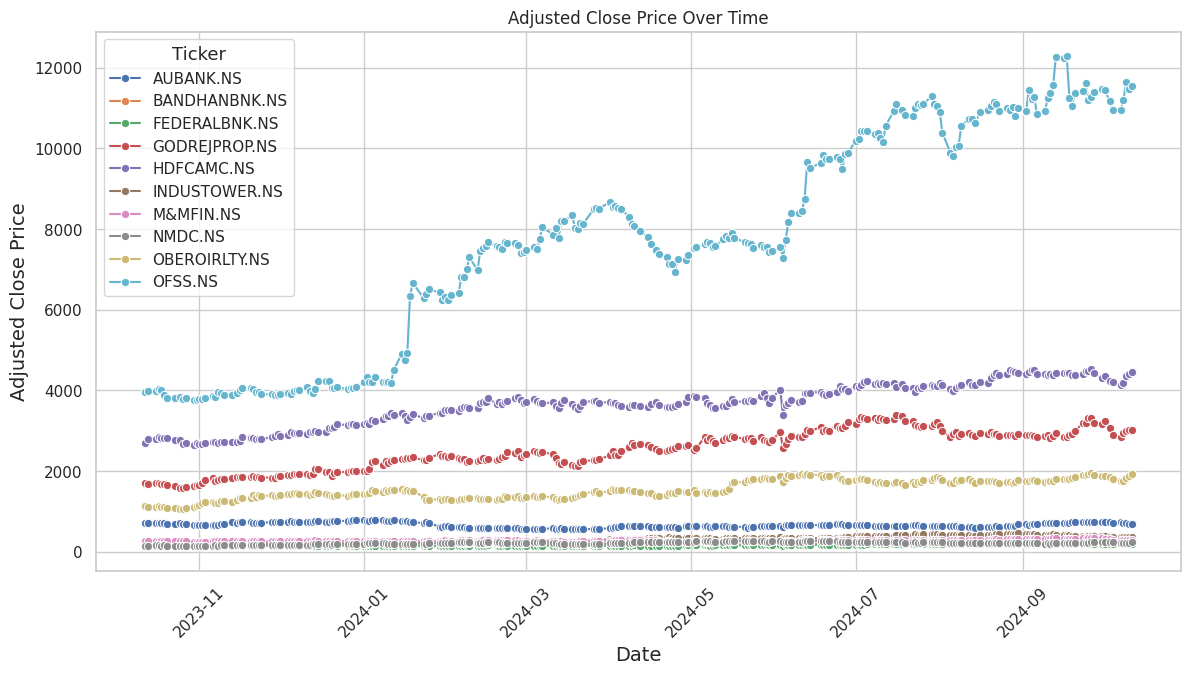

In [ ]:
#generates a line plot that shows the adjusted closing prices of multiple stocks

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

sns.lineplot(data=data_reset, x='Date', y='Adj Close', hue='Ticker', marker='o')

plt.title('Adjusted Close Price Over Time', fontsize=12)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)

plt.xticks(rotation=45)

plt.show()

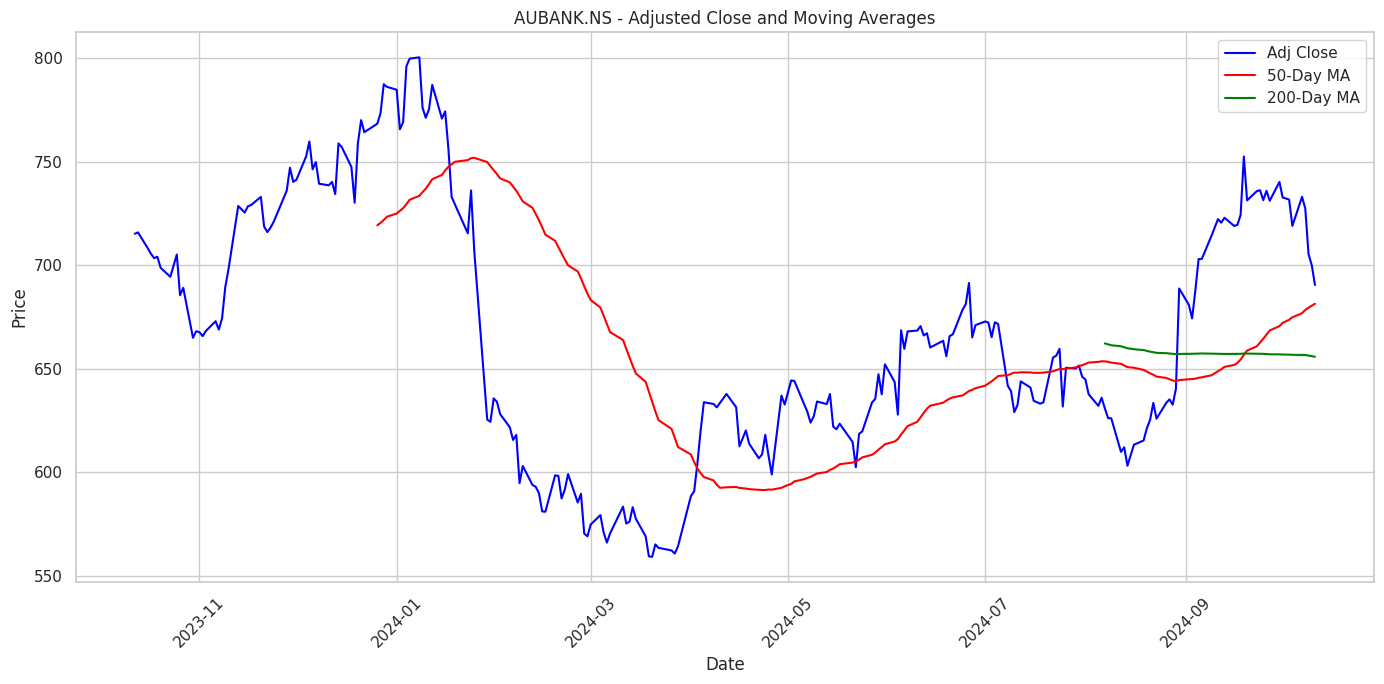

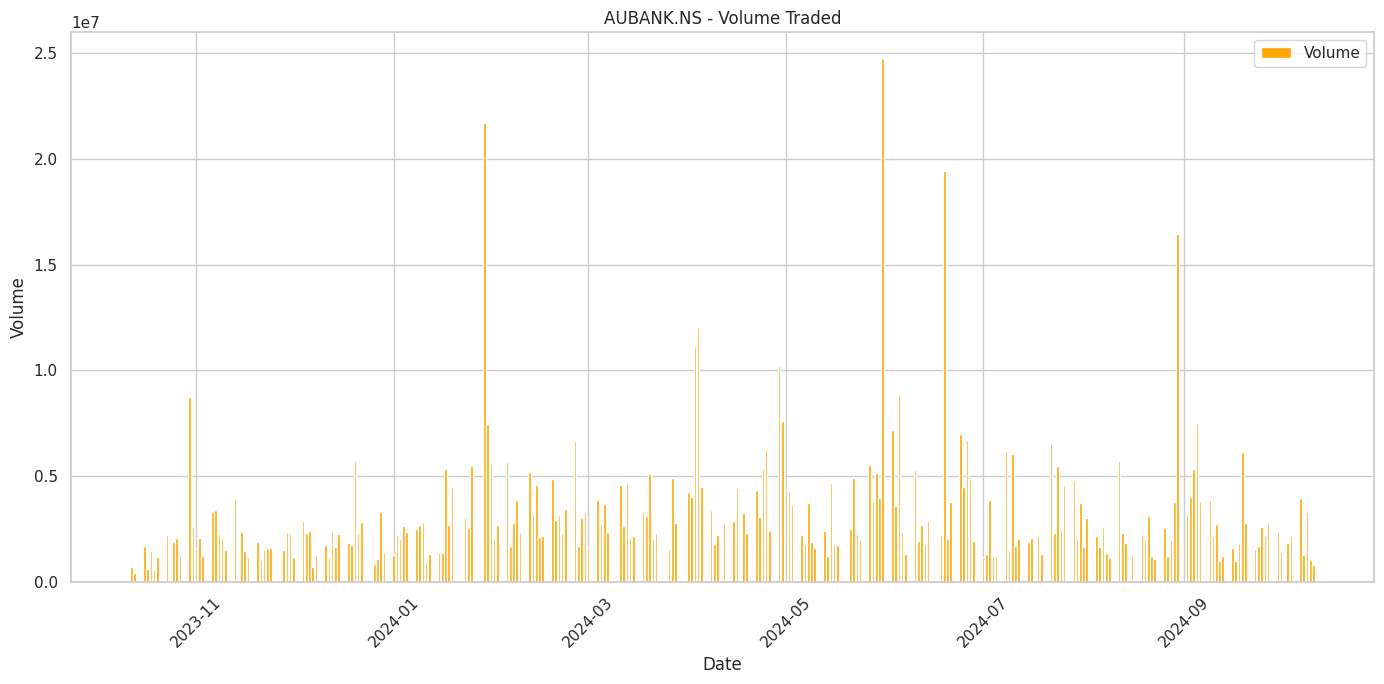

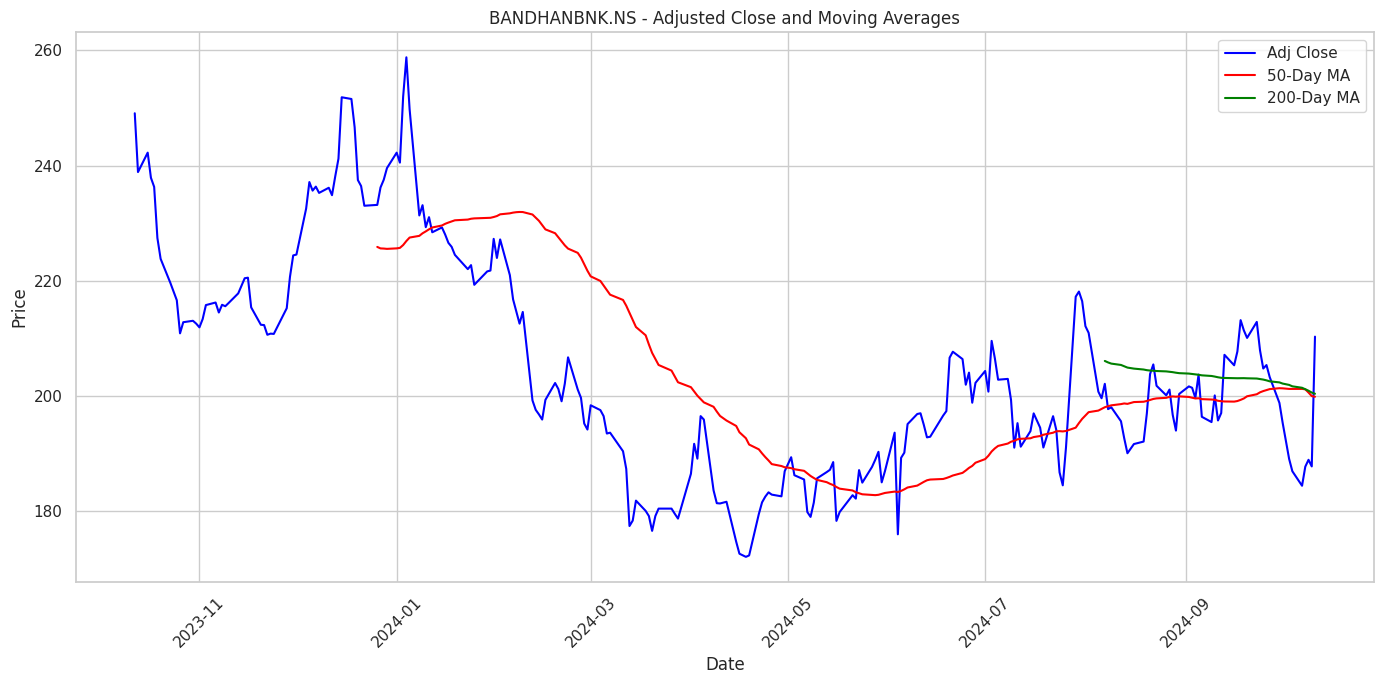

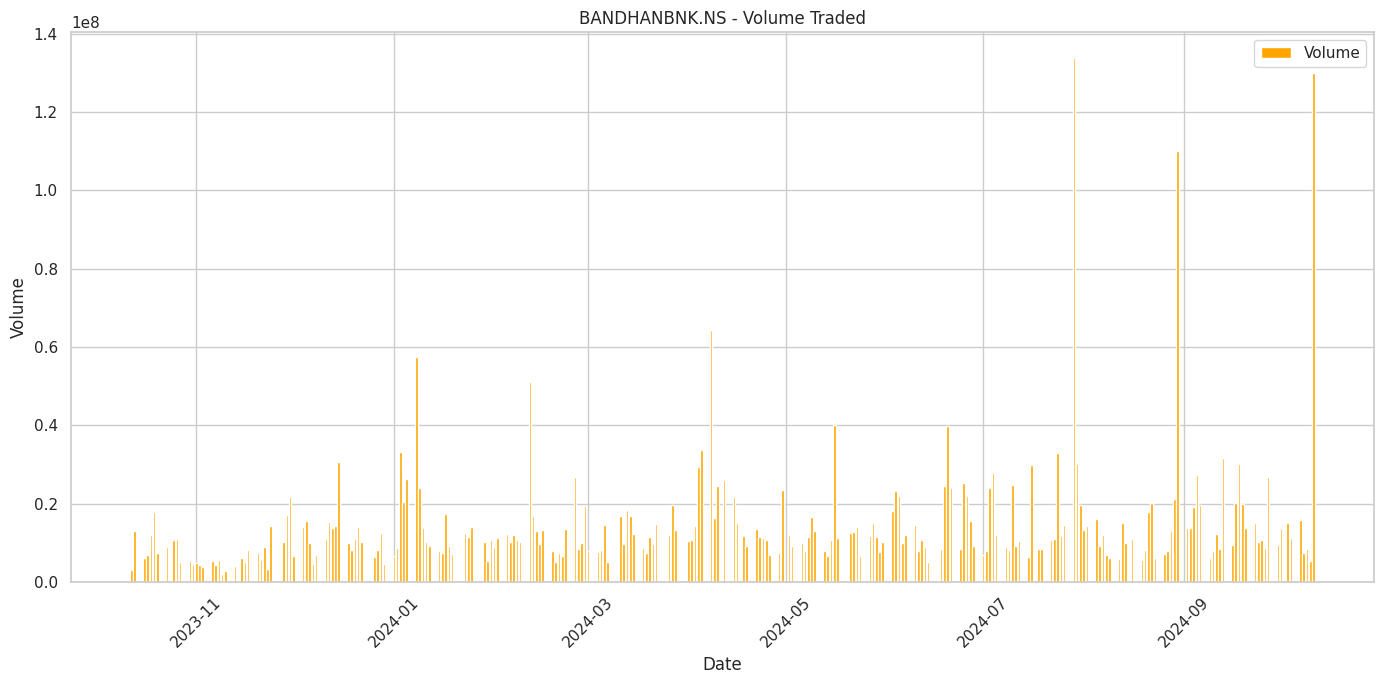

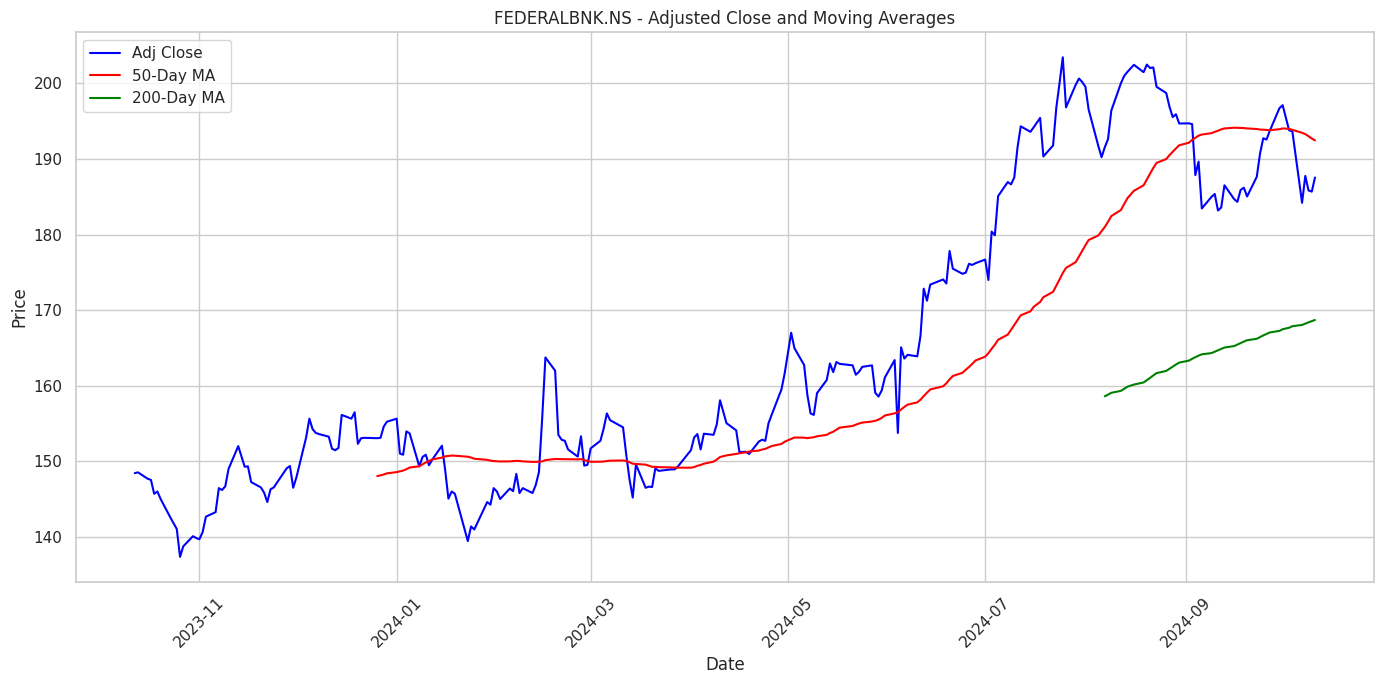

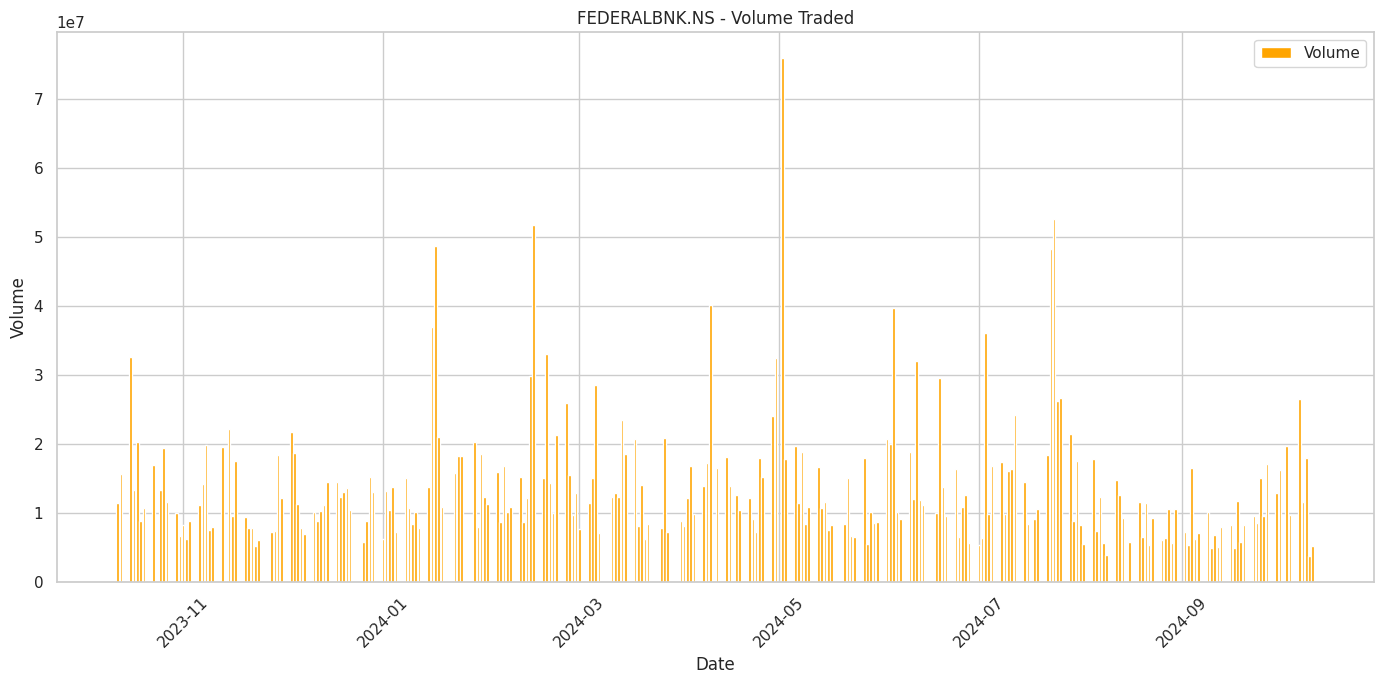

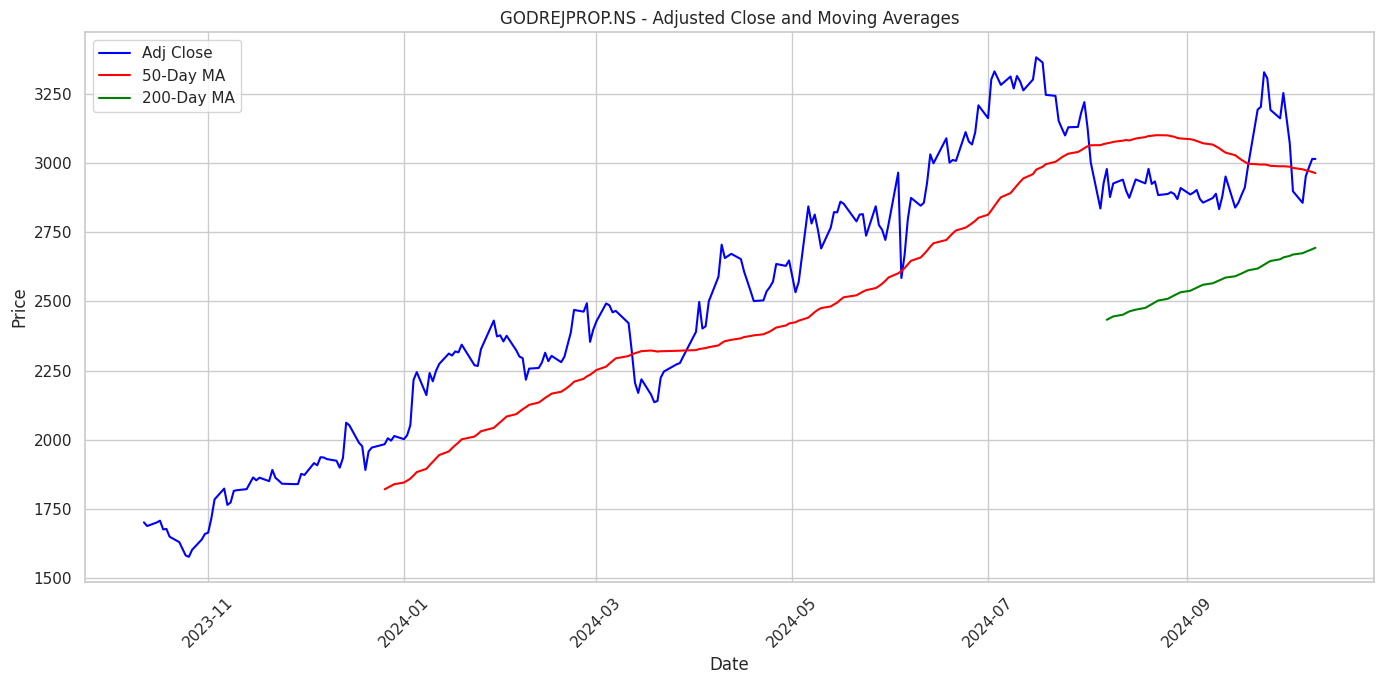

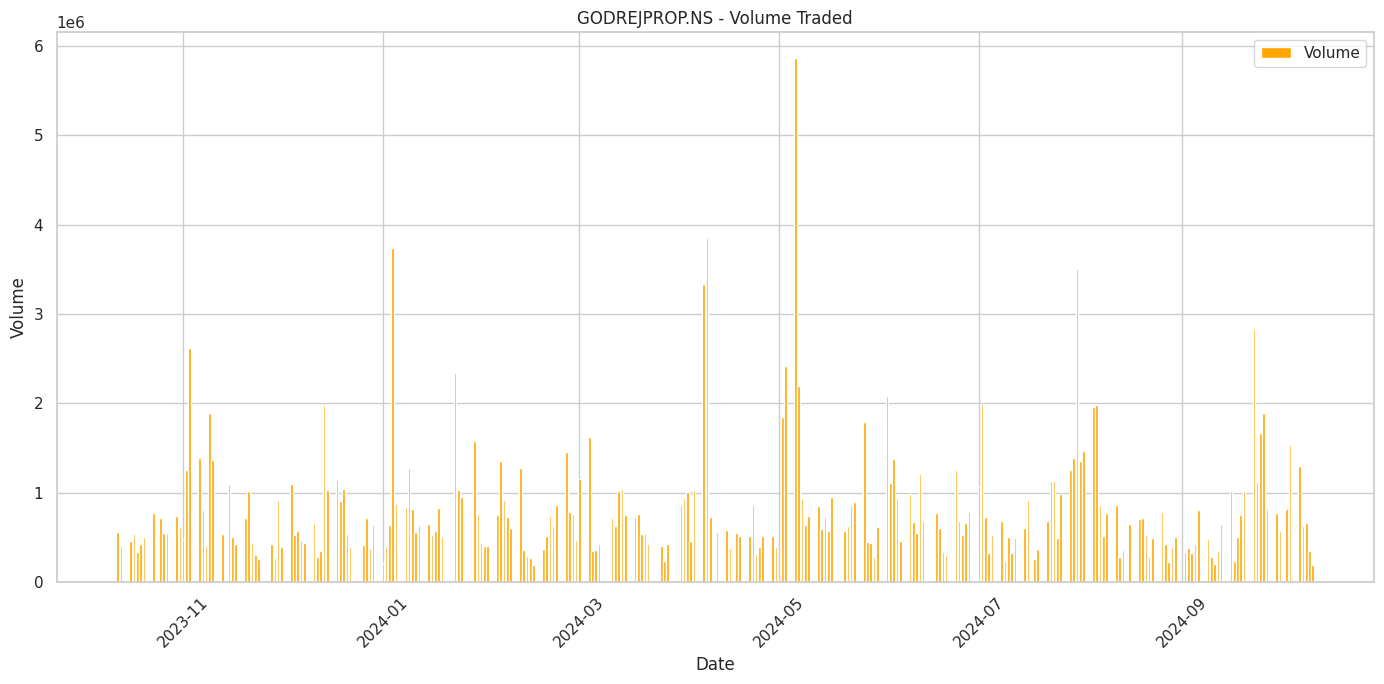

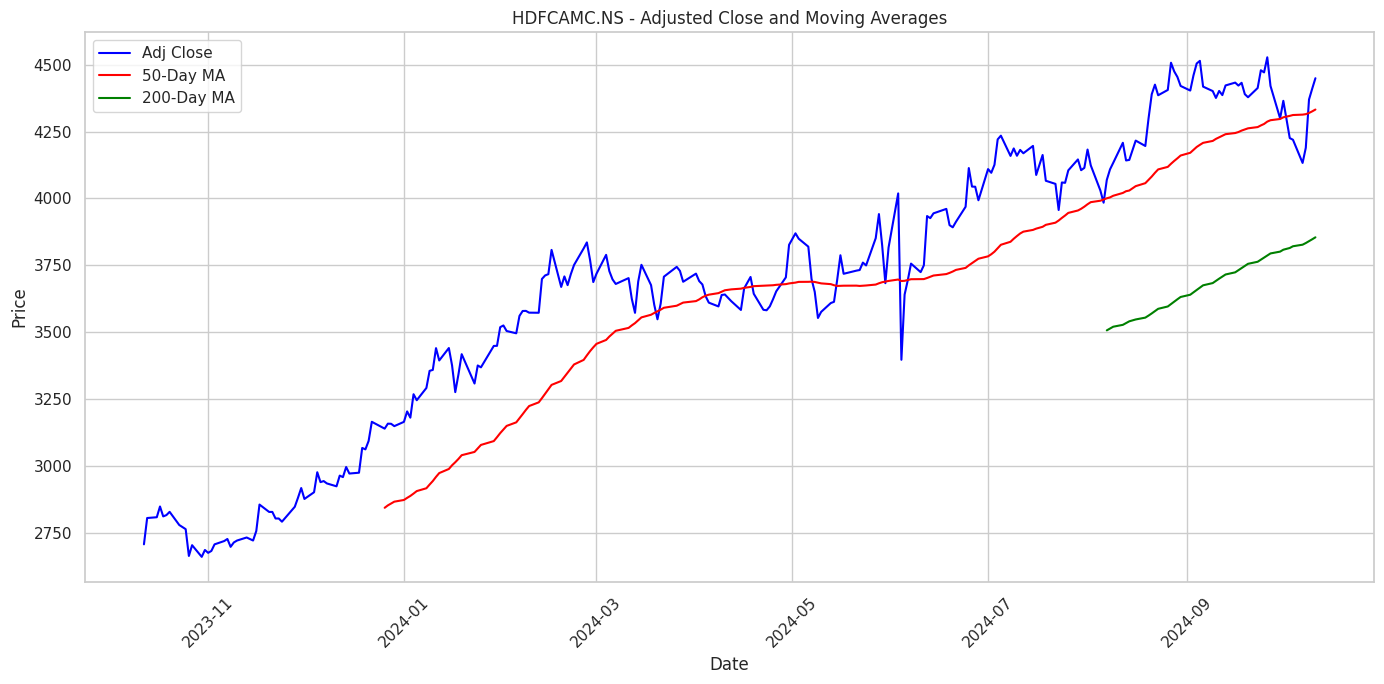

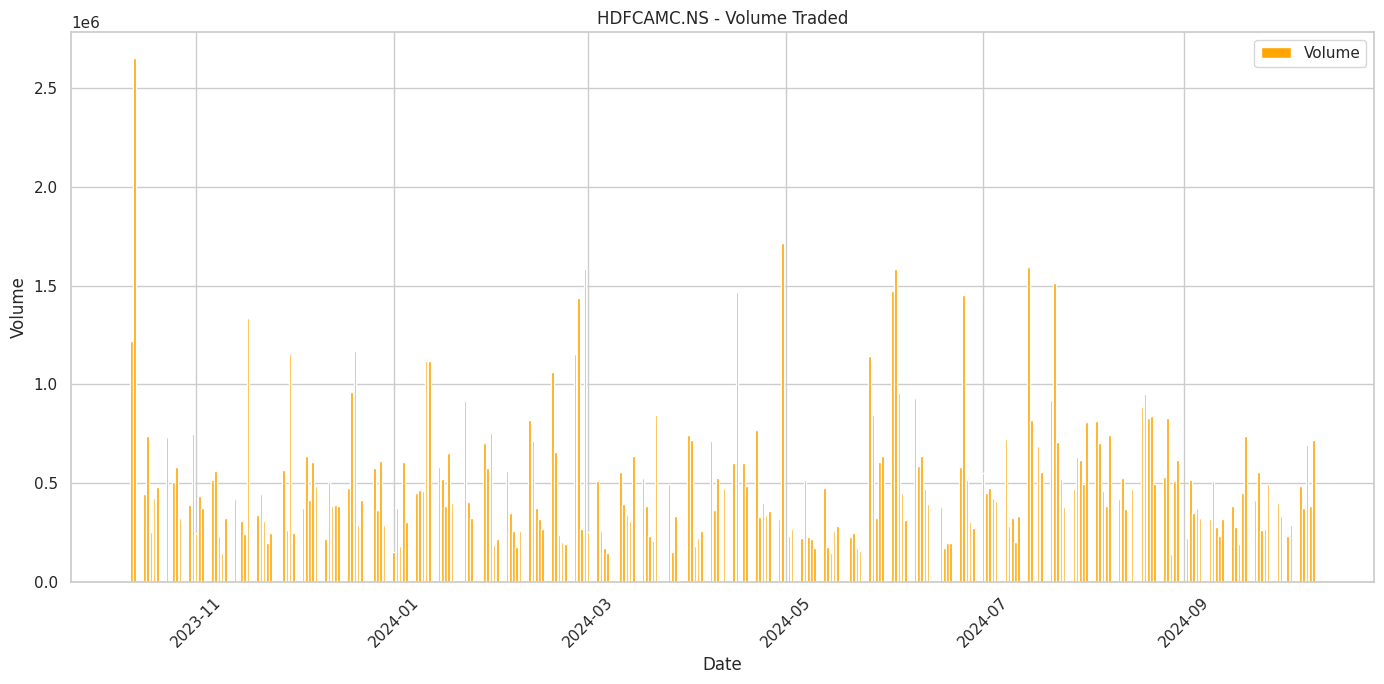

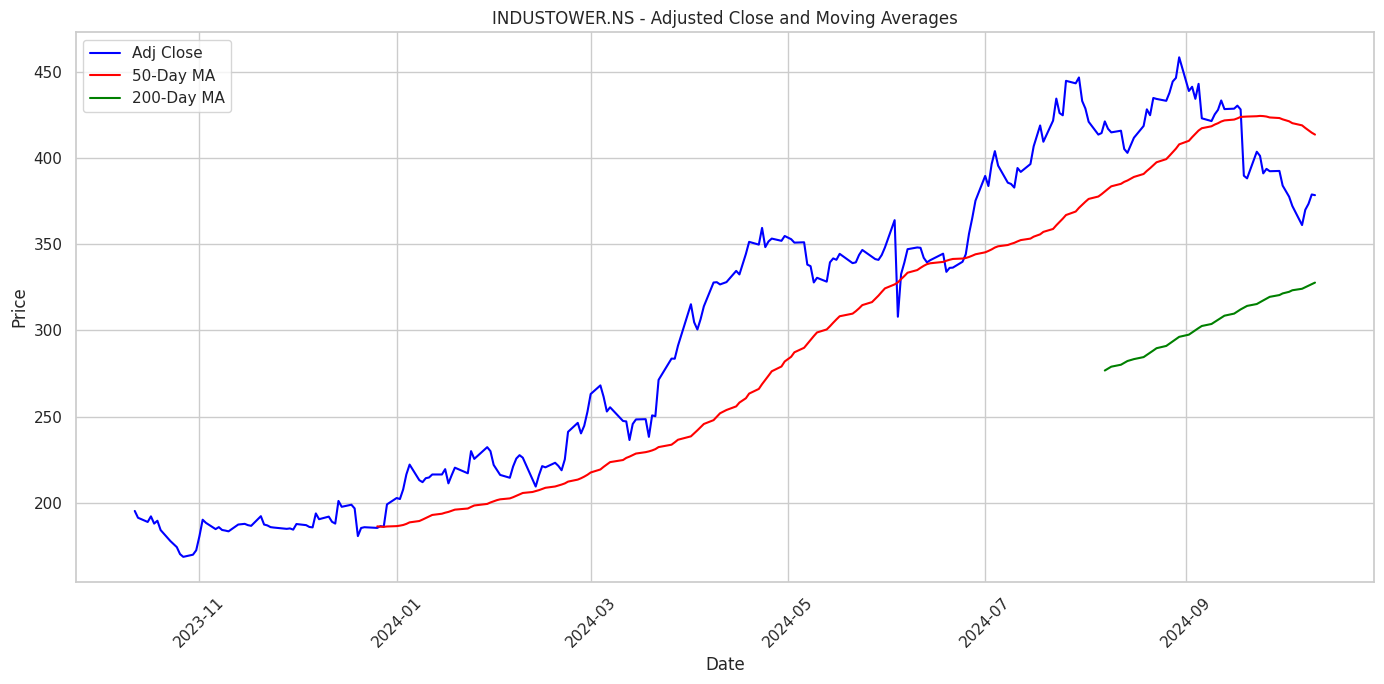

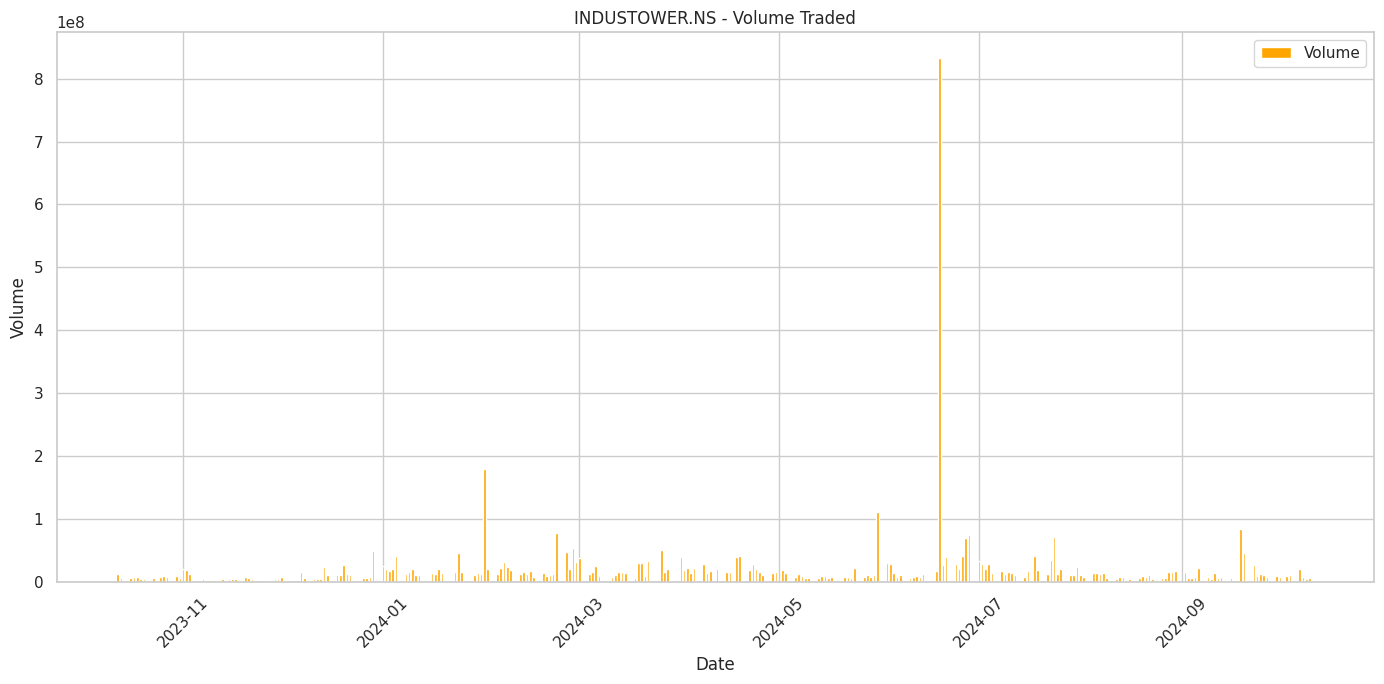

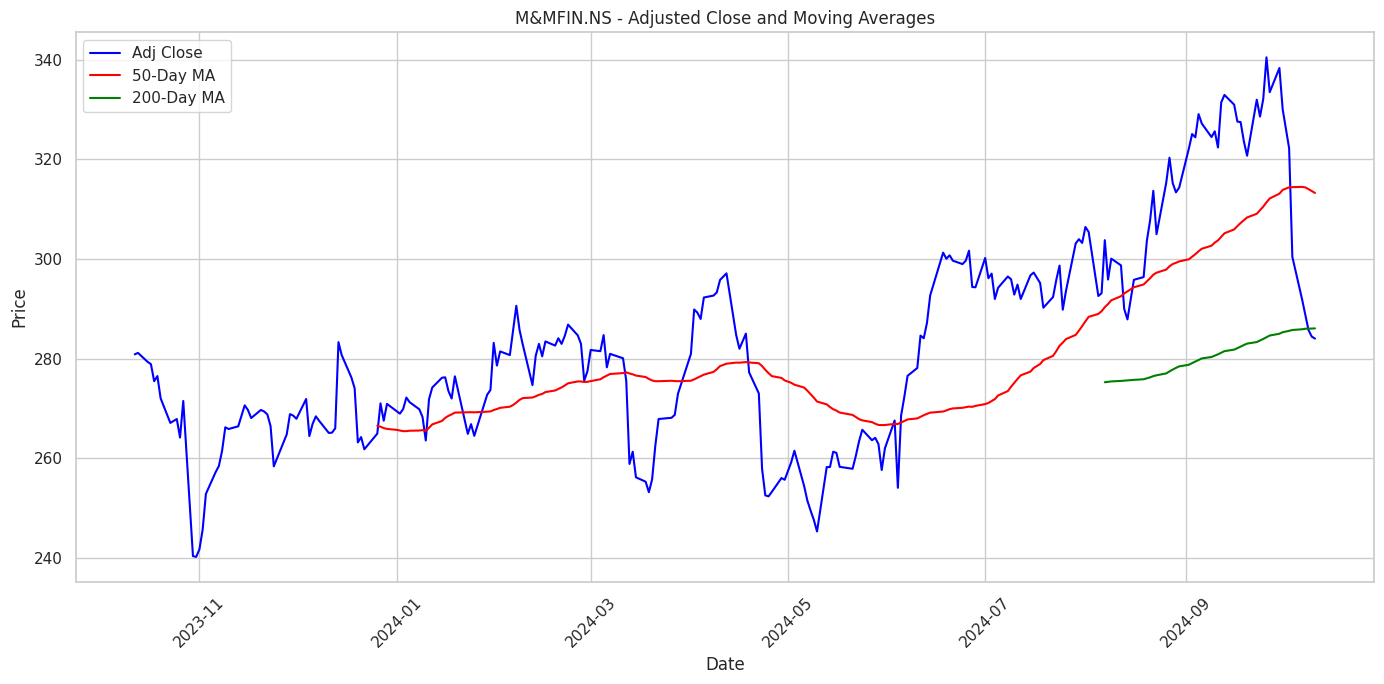

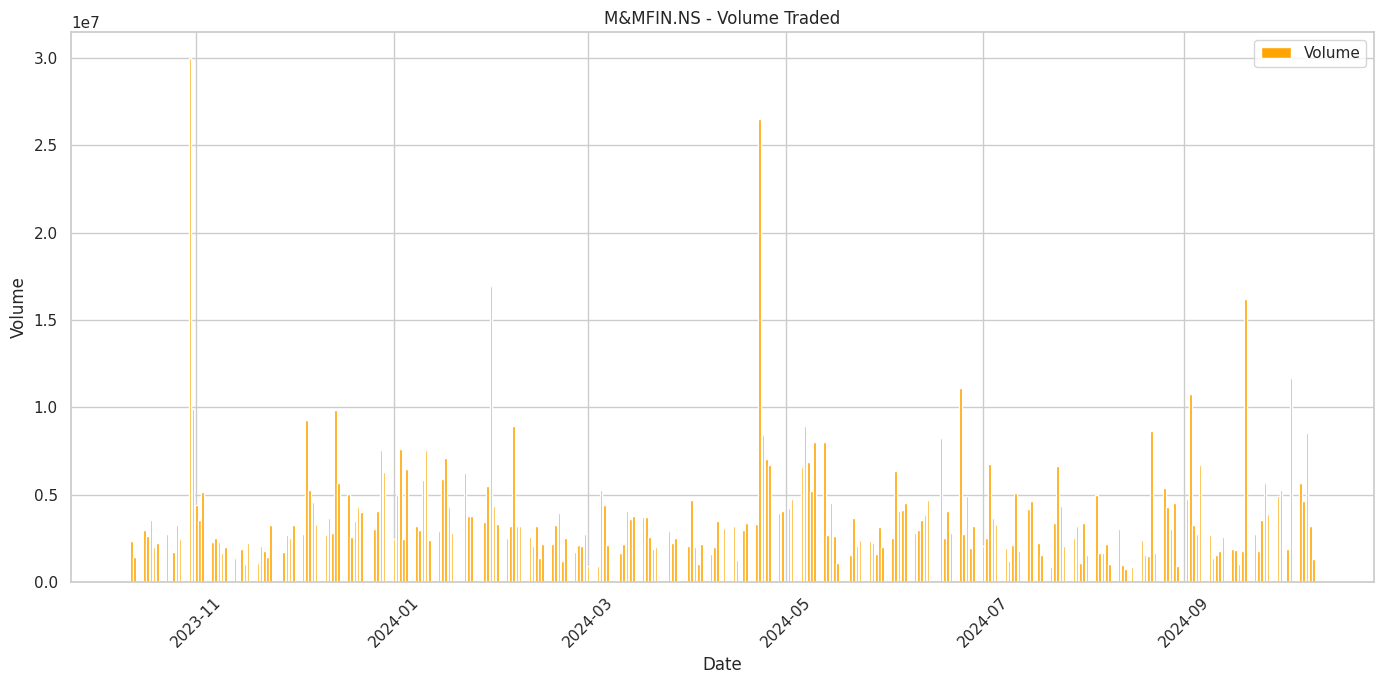

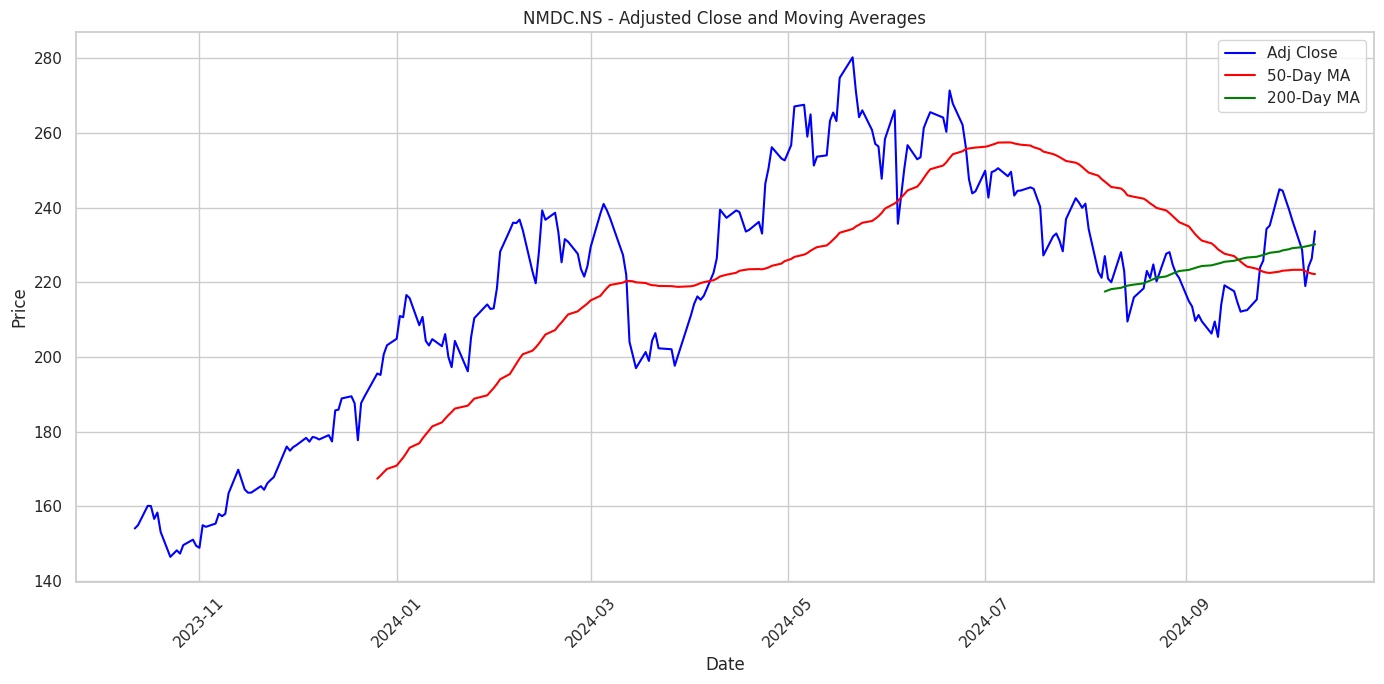

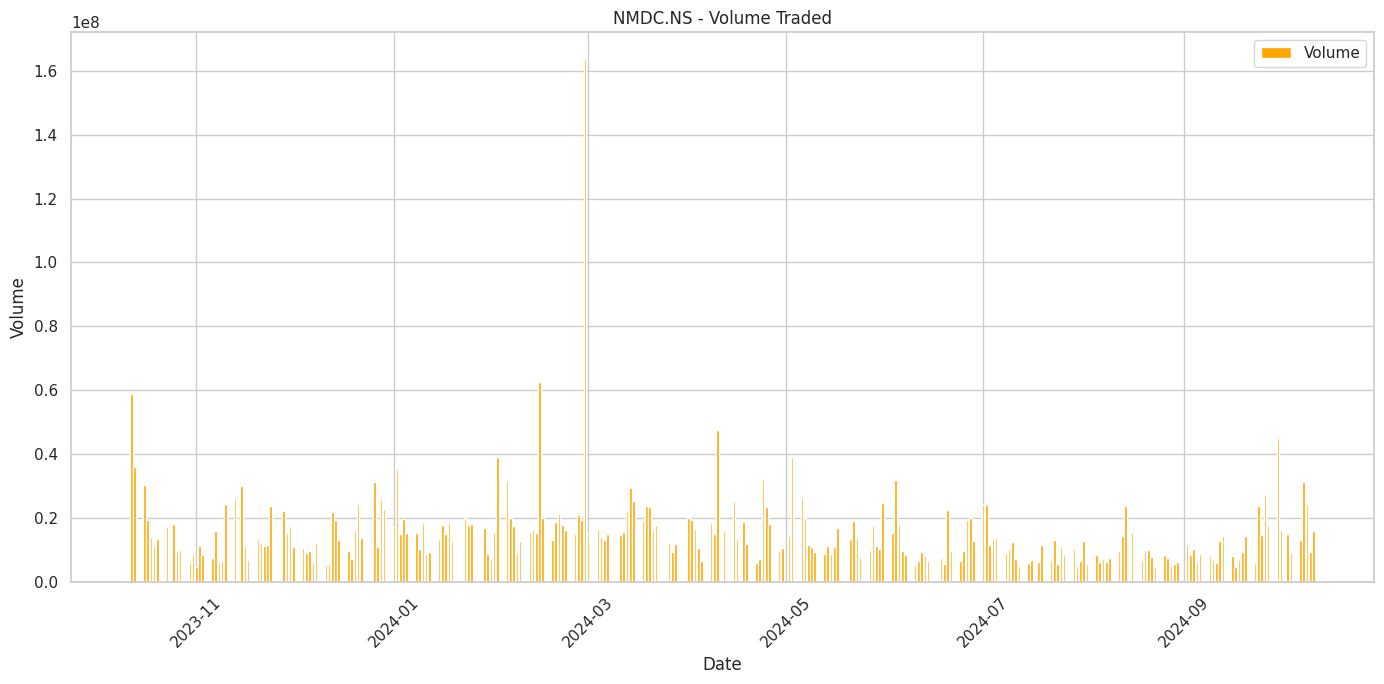

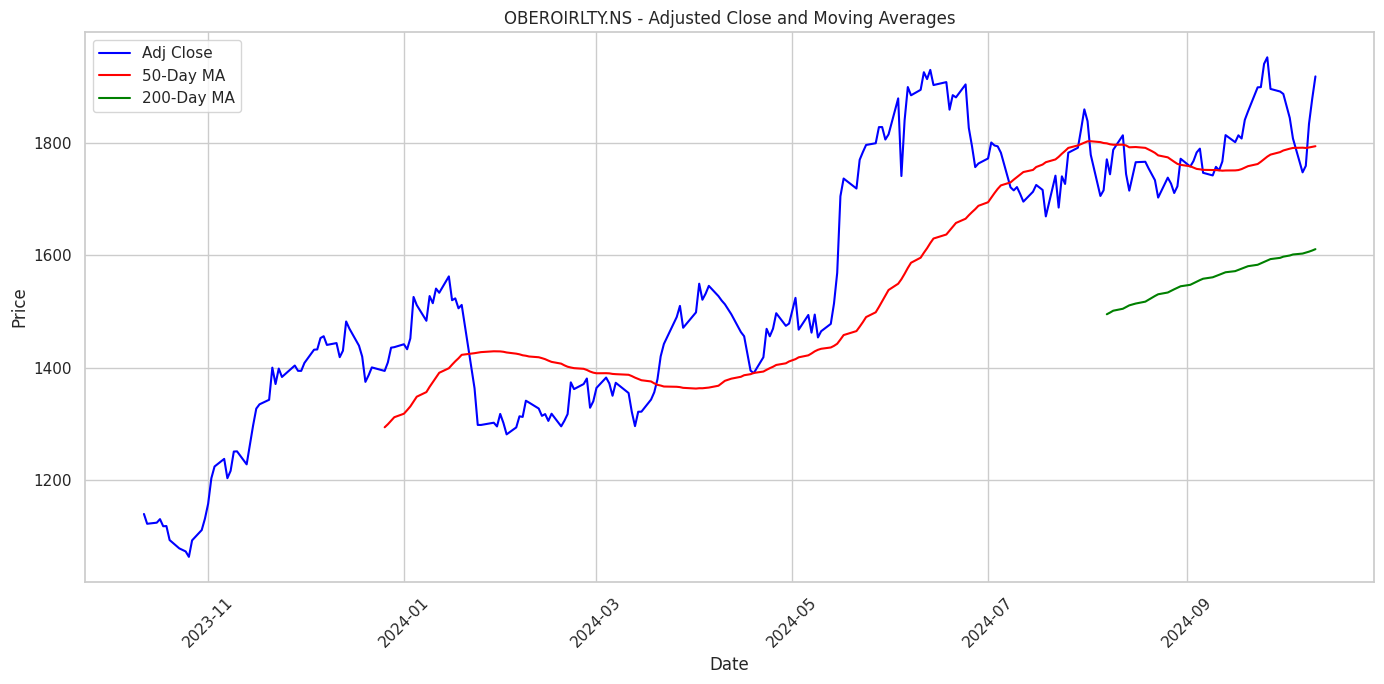

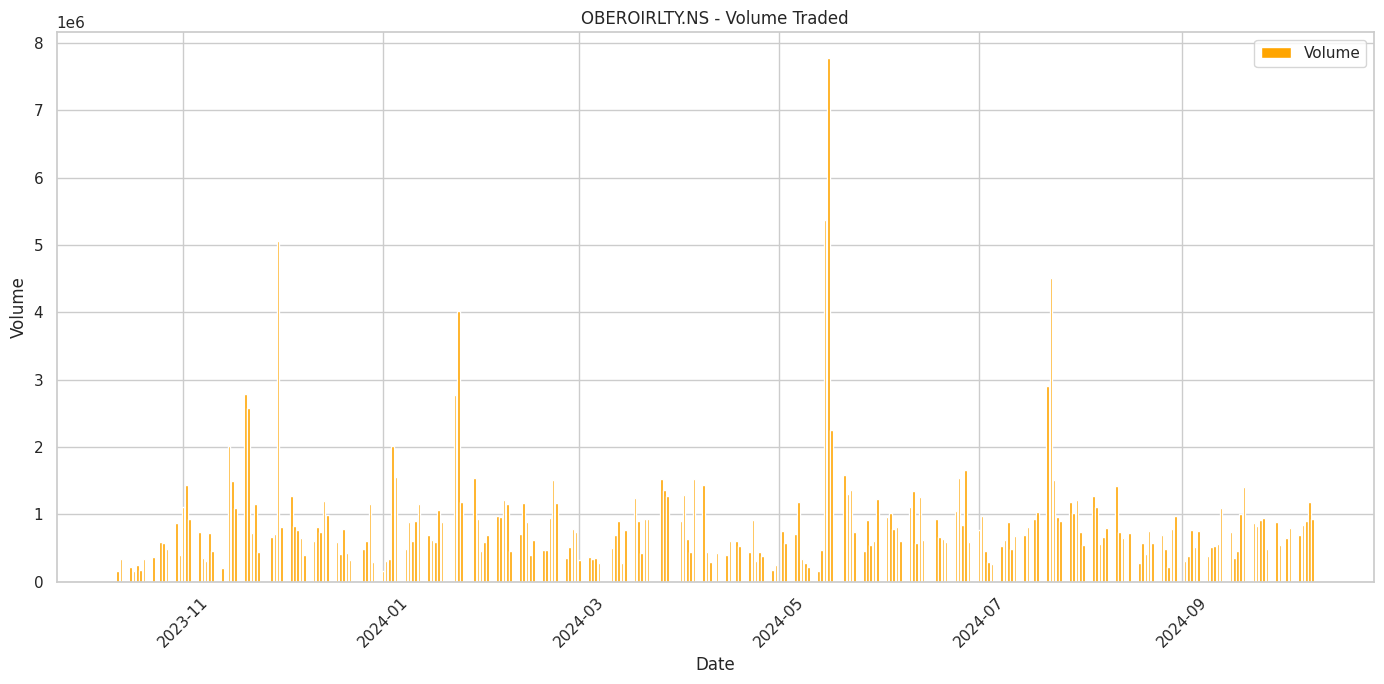

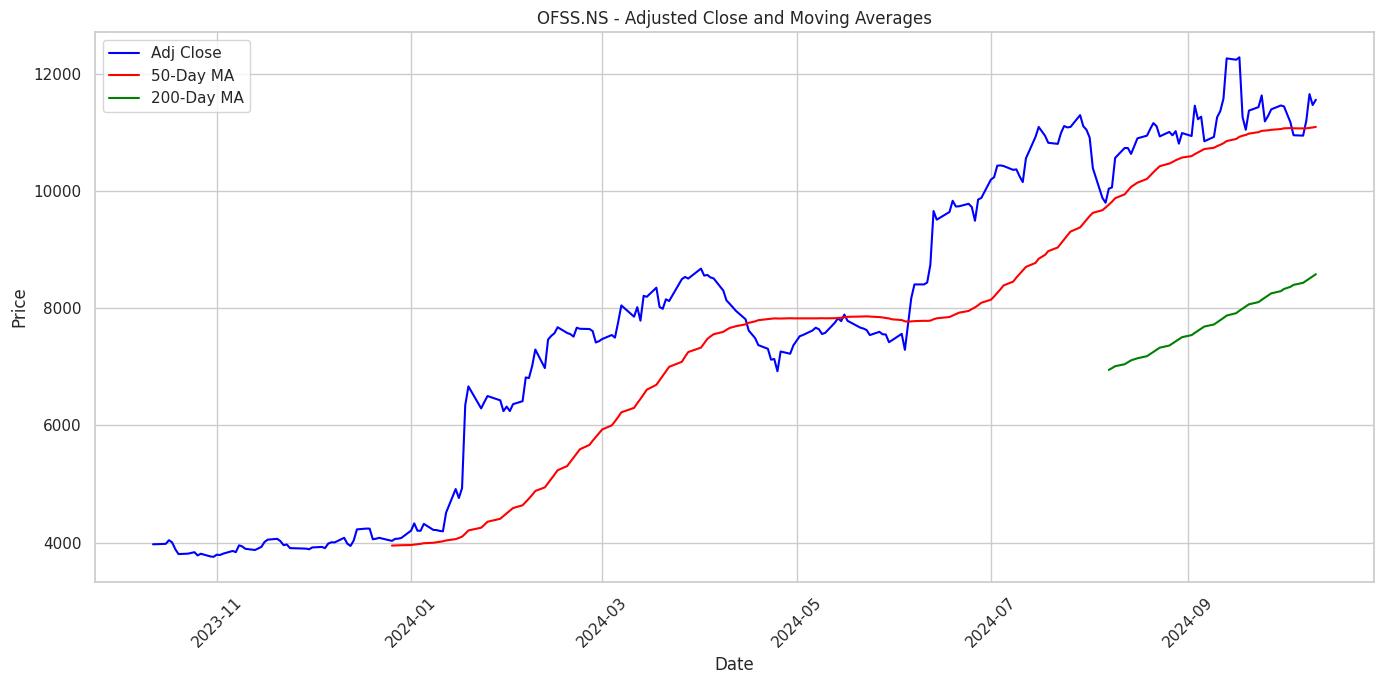

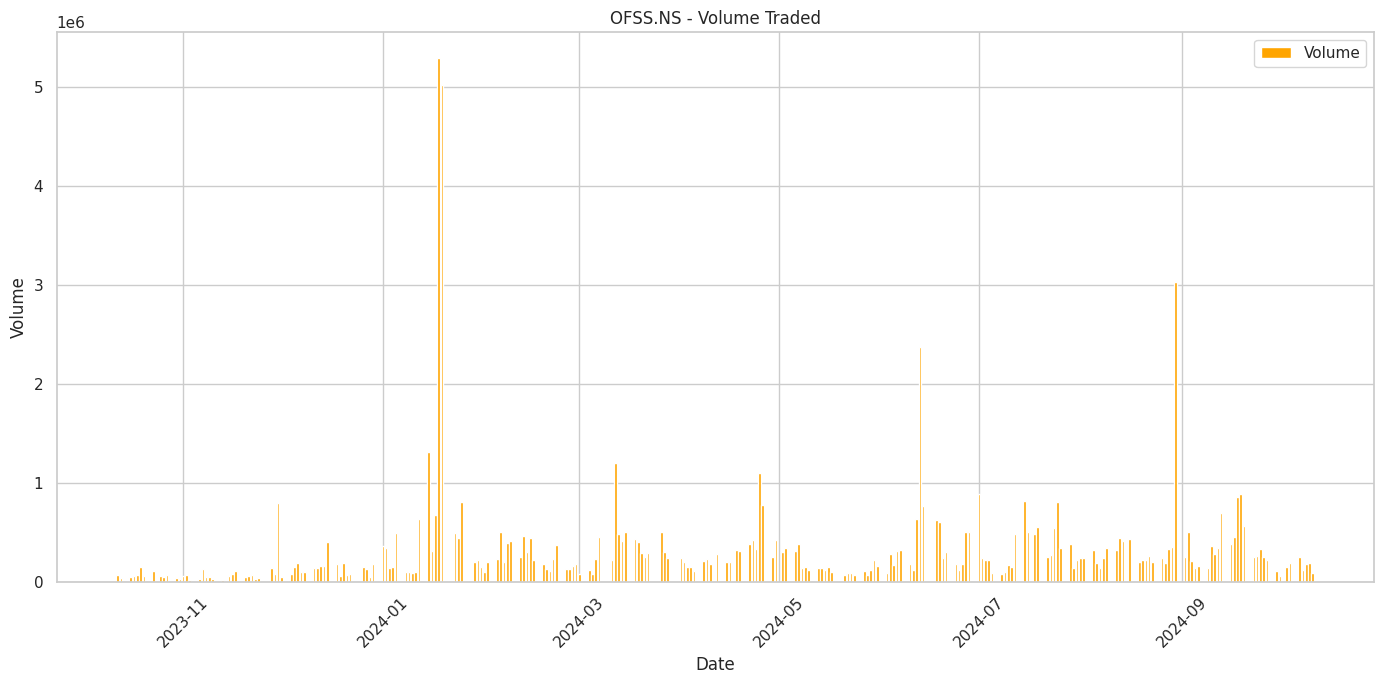

In [ ]:
#visualizations provide insights into stock price trends, moving averages, and trading volume.

unique_tickers = data_reset['Ticker'].unique()

for ticker in unique_tickers:
    ticker_data = data_reset[data_reset['Ticker'] == ticker].copy()


    if 'Ticker' not in ticker_data.columns:
        print(f"'Ticker' column missing for {ticker}")
        continue

#Calculating moving averages
    ticker_data['50_MA'] = ticker_data['Adj Close'].rolling(window=50).mean()
    ticker_data['200_MA'] = ticker_data['Adj Close'].rolling(window=200).mean()

#Plotting Adjusted Close and Moving Averages
    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data['Date'], ticker_data['Adj Close'], label='Adj Close', color='blue')
    plt.plot(ticker_data['Date'], ticker_data['50_MA'], label='50-Day MA', color='red')
    plt.plot(ticker_data['Date'], ticker_data['200_MA'], label='200-Day MA', color='green')
    plt.title(f'{ticker} - Adjusted Close and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#Plotting Volume
    plt.figure(figsize=(14, 7))
    plt.bar(ticker_data['Date'], ticker_data['Volume'], label='Volume', color='orange')
    plt.title(f'{ticker} - Volume Traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

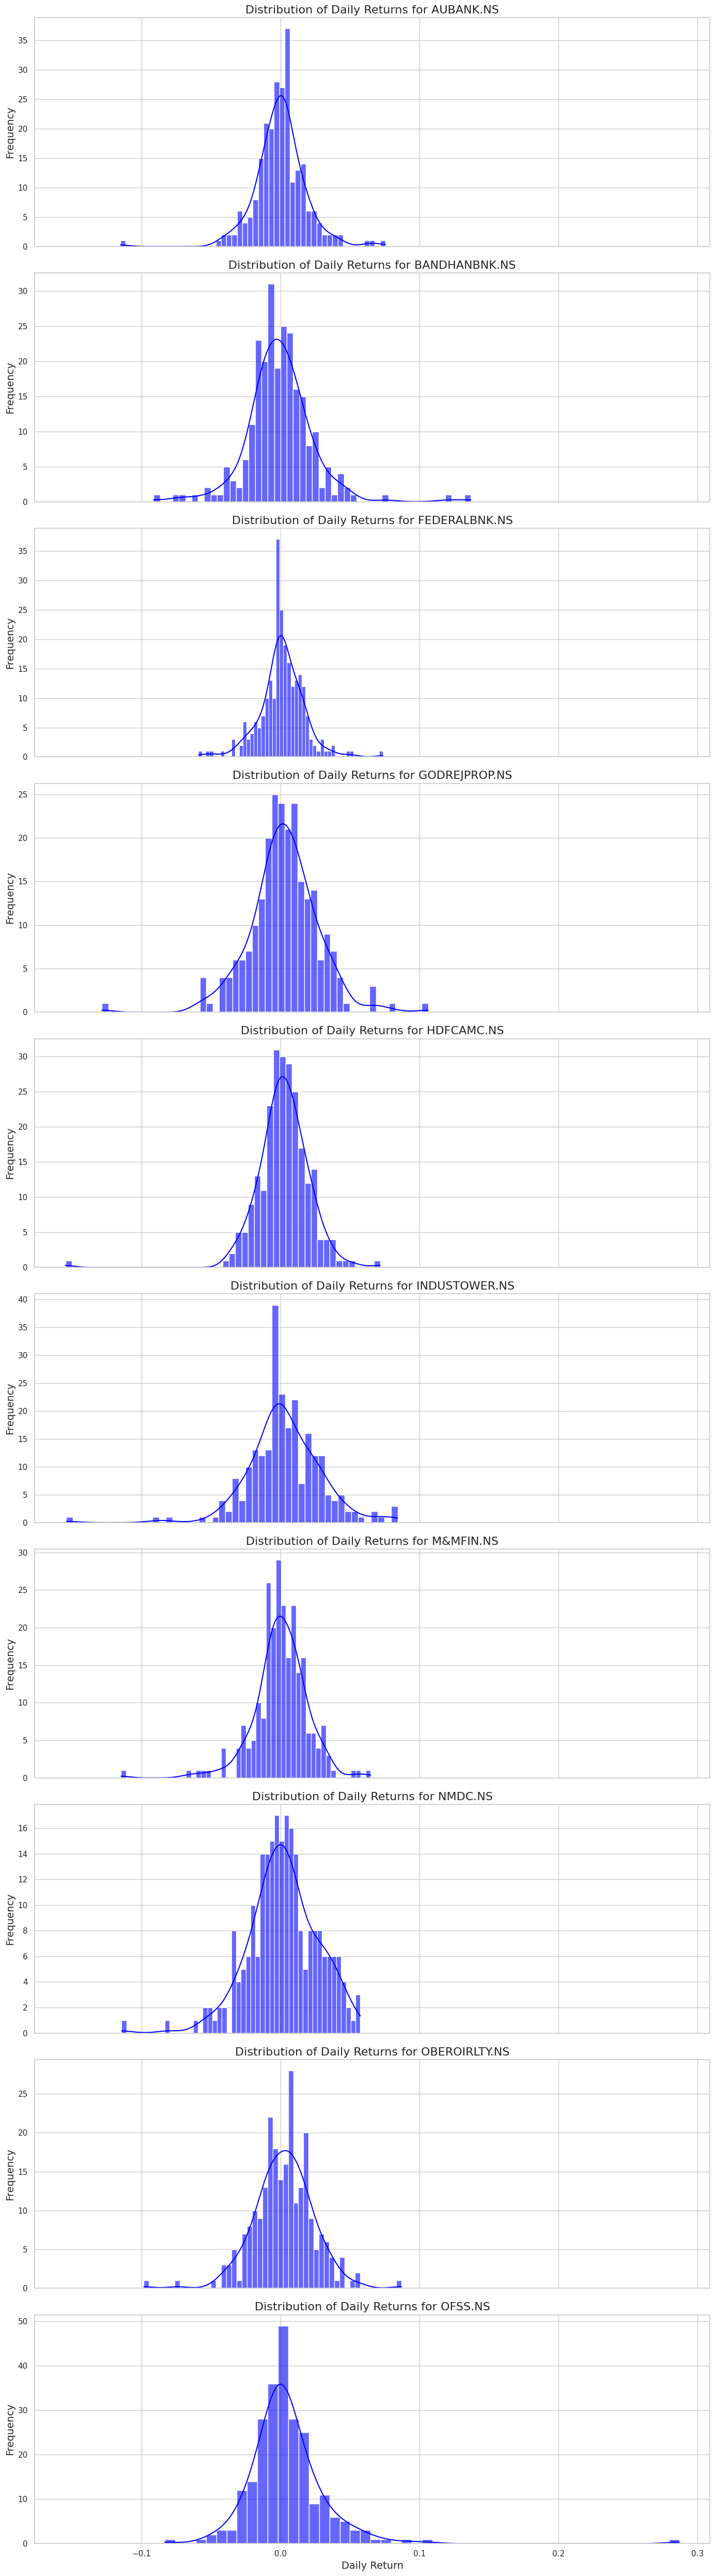

In [ ]:
# calculate the daily returns for each stock and then plot the distribution of daily returns for each stock ticker.

data_reset['Daily Return'] = data_reset.groupby('Ticker')['Adj Close'].pct_change()

unique_tickers = data_reset['Ticker'].unique()

#subplots for each ticker
num_tickers = len(unique_tickers)
fig, axes = plt.subplots(num_tickers, 1, figsize=(14, 5 * num_tickers), sharex=True)

for ax, ticker in zip(axes, unique_tickers):
    ticker_data = data_reset[data_reset['Ticker'] == ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, ax=ax, color='blue', alpha=0.6)

    ax.set_title(f'Distribution of Daily Returns for {ticker}', fontsize=16)
    ax.set_xlabel('Daily Return', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.grid(True)

plt.tight_layout()
plt.show()


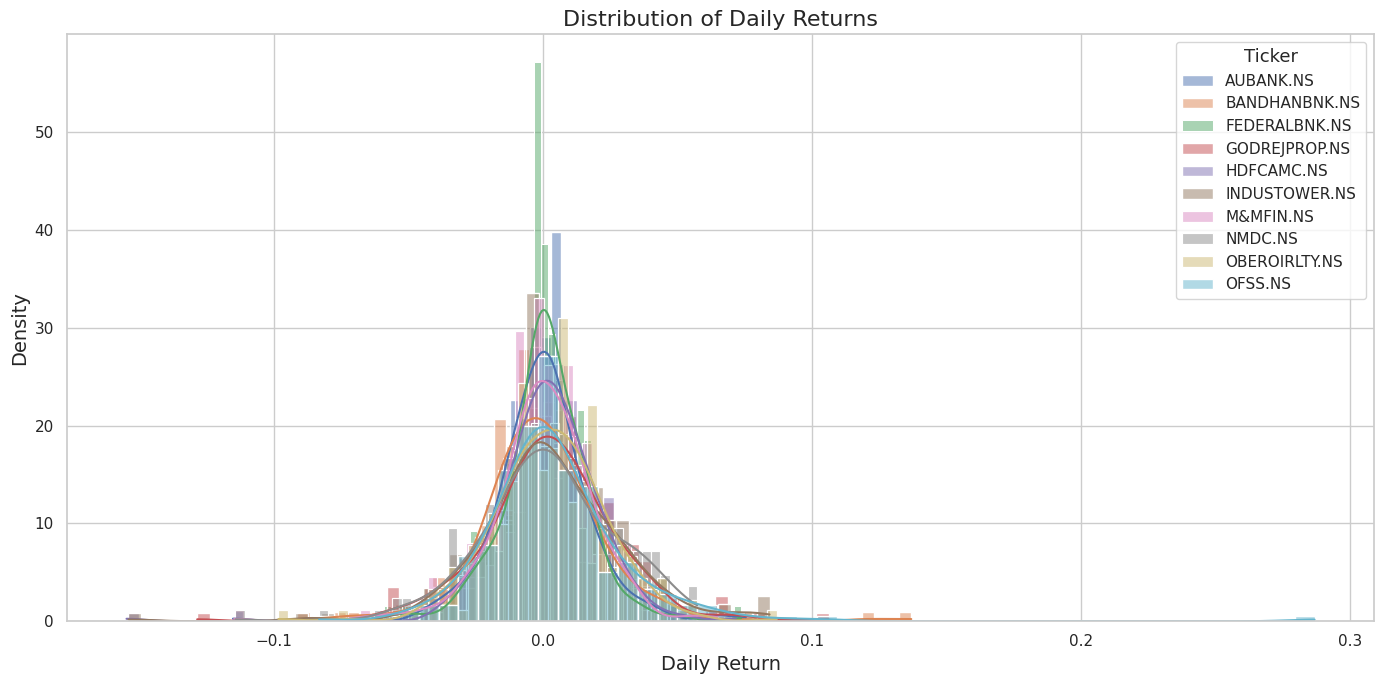

In [ ]:
data_reset['Daily Return'] = data_reset.groupby('Ticker')['Adj Close'].pct_change()

unique_tickers = data_reset['Ticker'].unique()

plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

for ticker in unique_tickers:
    ticker_data = data_reset[data_reset['Ticker'] == ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, label=ticker, alpha=0.5, stat='density')

plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()

plt.show()

Ticker        Date OBEROIRLTY.NS                                         \
Price                       Open         High          Low        Close   
0       2023-10-12   1148.599976  1155.750000  1136.349976  1146.349976   
1       2023-10-13   1144.800049  1156.000000  1125.099976  1128.750000   
2       2023-10-16   1127.949951  1142.699951  1125.599976  1130.750000   
3       2023-10-17   1130.750000  1146.849976  1127.000000  1137.099976   
4       2023-10-18   1136.900024  1137.199951  1110.849976  1124.349976   

Ticker                        AUBANK.NS                          ...  \
Price     Adj Close  Volume        Open        High         Low  ...   
0       1138.945801  153722  719.000000  723.000000  715.000000  ...   
1       1121.459473  331803  716.299988  720.000000  712.000000  ...   
2       1123.446533  217255  716.950012  716.950012  703.150024  ...   
3       1129.755371  161833  714.799988  714.799988  706.000000  ...   
4       1117.087891  254617  708.900024  7

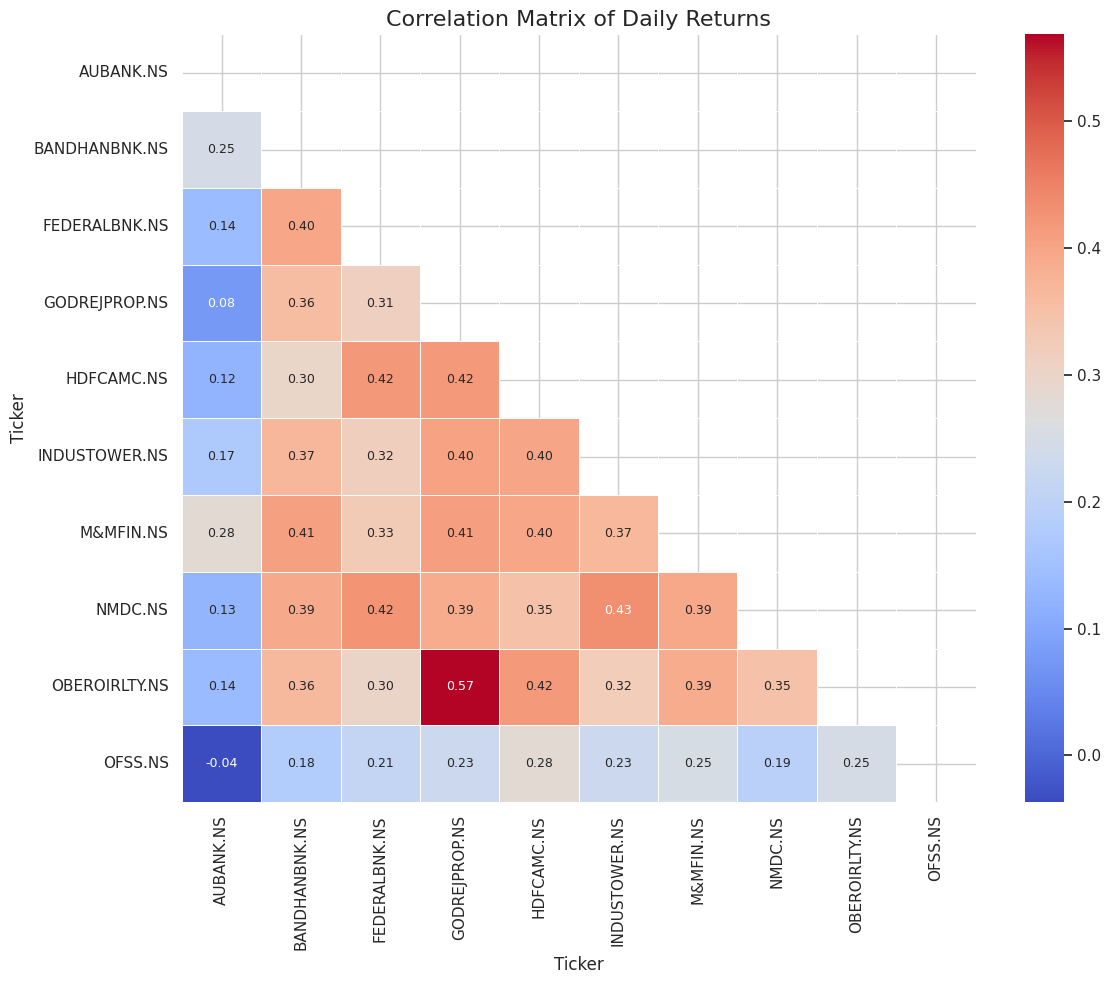

In [ ]:
#daily returns
data_reset['Daily Return'] = data_reset.groupby('Ticker')['Adj Close'].pct_change()

print(stock_data_reset.head())
print(stock_data_reset.columns)

daily_returns = data_reset.pivot_table(index='Date', columns='Ticker', values='Daily Return')

correlation_matrix = daily_returns.corr()

plt.figure(figsize=(12, 10))
sns.set(style='whitegrid')

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

#Plotting heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', annot_kws={"size": 9})
plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

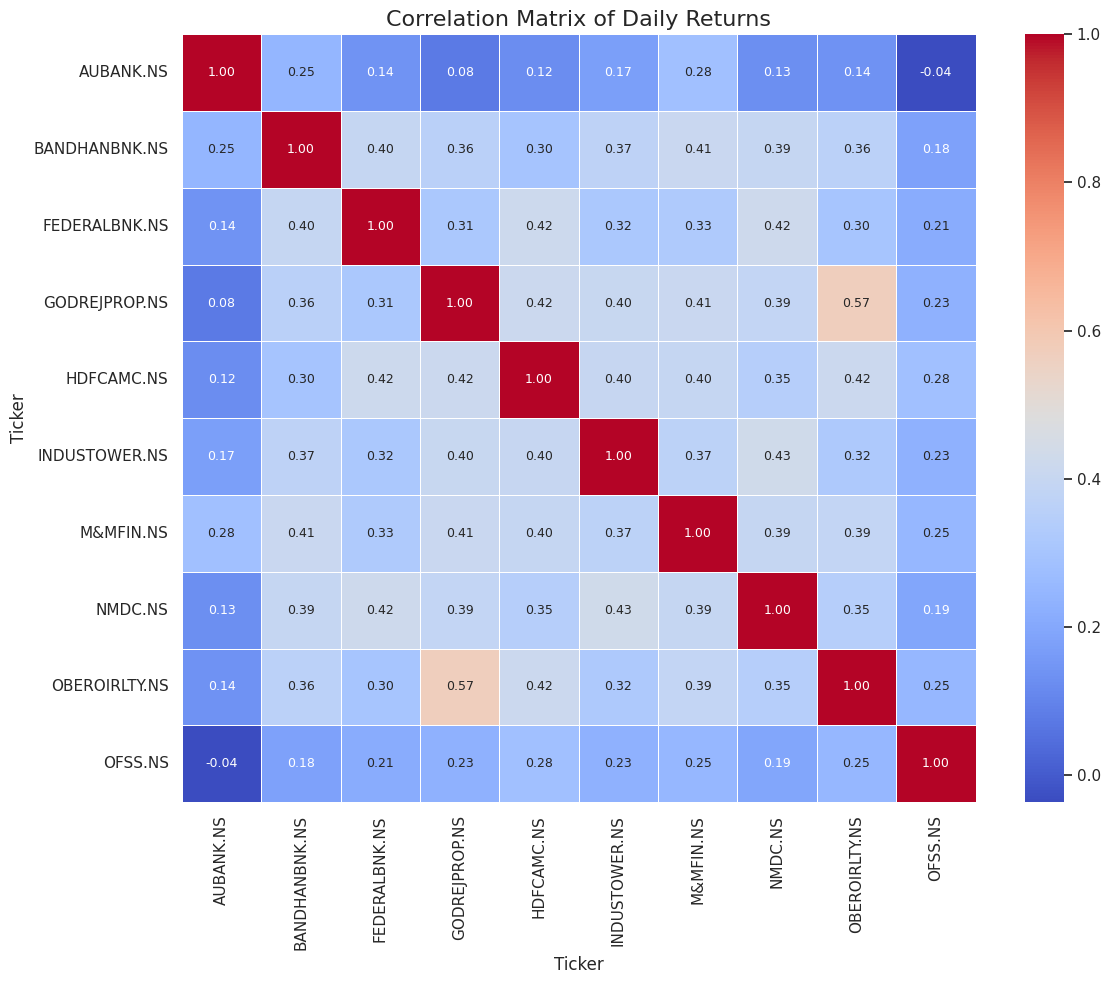

In [ ]:
data_reset['Daily Return'] = data_reset.groupby('Ticker')['Adj Close'].pct_change()

#pivot table for daily returns
daily_returns = data_reset.pivot_table(index='Date', columns='Ticker', values='Daily Return')

#Calculating correlation matrix
correlation_matrix = daily_returns.corr()

plt.figure(figsize=(12, 10))
sns.set(style='whitegrid')

#heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', annot_kws={"size": 9})
plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#returns
expected_returns = daily_returns.mean() * 252

#volatility
volatility = daily_returns.std() * np.sqrt(252)

stock_stats = pd.DataFrame({
    'Expected Return': expected_returns,
    'Volatility': volatility
})

print(stock_stats)

               Expected Return  Volatility
Ticker                                    
AUBANK.NS             0.007265    0.295123
BANDHANBNK.NS        -0.101550    0.386224
FEDERALBNK.NS         0.273937    0.254113
GODREJPROP.NS         0.669559    0.395698
HDFCAMC.NS            0.561962    0.307660
INDUSTOWER.NS         0.776489    0.427391
M&MFIN.NS             0.060468    0.311194
NMDC.NS               0.509328    0.395861
OBEROIRLTY.NS         0.597578    0.341135
OFSS.NS               1.209277    0.473685


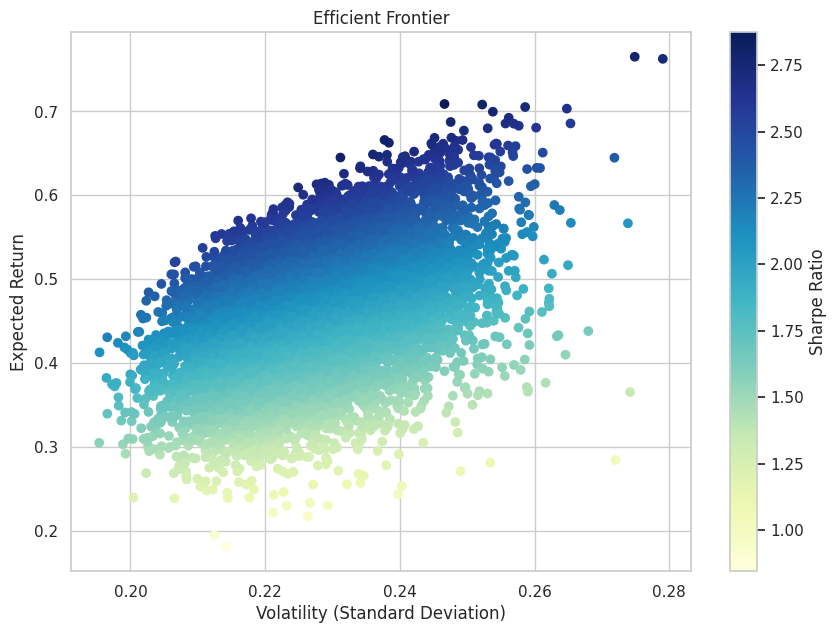

In [ ]:
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

#number of portfolios
num_portfolios = 10000

results = np.zeros((3, num_portfolios))

#annualized covariance matrix
cov_matrix = daily_returns.cov() * 252

np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = portfolio_return / portfolio_volatility

plt.figure(figsize=(10, 7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

In [ ]:
data = yf.download(tickers, start="2023-10-12", end="2024-10-12")['Adj Close']

returns = data.pct_change().dropna()

#expected returns and covariance matrix
expected_returns = returns.mean().values
cov_matrix = returns.cov().values

#calculate portfolio performance
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

num_portfolios = 5000

results = np.zeros((3, num_portfolios))

np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = portfolio_return / portfolio_volatility

#interactive plot
fig = go.Figure()

#scatter plot
fig.add_trace(go.Scatter(
    x=results[1, :],
    y=results[0, :],
    mode='markers',
    marker=dict(
        color=results[2, :],
        colorscale='YlGnBu',
        size=5,
        colorbar=dict(title='Sharpe Ratio'),
        line=dict(width=1)
    ),
    text=['Weight: ' + str(np.round(weights, 2)) for weights in [np.random.random(len(tickers)) for _ in range(num_portfolios)]]
))

fig.update_layout(
    title='Efficient Frontier',
    xaxis_title='Volatility (Standard Deviation)',
    yaxis_title='Expected Return',
    template='plotly_white',
    width=850,
    height=500
)

offline.iplot(fig)

[*********************100%***********************]  48 of 48 completed


In [ ]:
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]

max_sharpe_return, max_sharpe_volatility, max_sharpe_ratio

(0.0021583324560632893, 0.011801690451916388, 0.18288333055819253)

In [ ]:
expected_returns = daily_returns.mean() * 252
print(f'Expected Returns Shape: {expected_returns.shape}')

#portfolio performance
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

num_portfolios = 10000

results = np.zeros((3, num_portfolios))

#Annualized covariance matrix
cov_matrix = daily_returns.cov() * 252
print(f'Covariance Matrix Shape: {cov_matrix.shape}')

np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = portfolio_return / portfolio_volatility

#interactive plot
fig = go.Figure()

#scatter plot for the efficient frontier
fig.add_trace(go.Scatter(
    x=results[1, :],
    y=results[0, :],
    mode='markers',
    marker=dict(
        color=results[2, :],
        colorscale='YlGnBu',
        size=5,
        colorbar=dict(title='Sharpe Ratio'),
        line=dict(width=1)
    ),
    text=['Weight: ' + str(np.round(weights, 2)) for weights in [np.random.random(len(unique_tickers)) for _ in range(num_portfolios)]]
))


fig.update_layout(
    title='Efficient Frontier',
    xaxis_title='Volatility (Standard Deviation)',
    yaxis_title='Expected Return',
    template='plotly_white',
    width=850,
    height=500
)

fig.show()


Expected Returns Shape: (10,)
Covariance Matrix Shape: (10, 10)


In [ ]:
#Function to calculate portfolio performance
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

#Number of portfolios
num_portfolios = 10000

results = np.zeros((3, num_portfolios))

#Annualized covariance matrix
cov_matrix = daily_returns.cov() * 252

np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = portfolio_return / portfolio_volatility

min_volatility_idx = np.argmin(results[1, :])
max_return_idx = np.argmax(results[0, :])

best_weights_min_volatility = np.random.random(len(unique_tickers))
best_weights_min_volatility /= np.sum(best_weights_min_volatility)

best_weights_max_return = np.random.random(len(unique_tickers))
best_weights_max_return /= np.sum(best_weights_max_return)

fig = go.Figure()

#scatter plot for the efficient frontier
fig.add_trace(go.Scatter(
    x=results[1, :],
    y=results[0, :],
    mode='markers',
    marker=dict(
        color=results[2, :],
        colorscale='YlGnBu',
        size=5,
        colorbar=dict(title='Sharpe Ratio'),
        line=dict(width=1)
    ),
    name='Portfolios'
))

#plot for minimum volatility
fig.add_trace(go.Scatter(
    x=[results[1, min_volatility_idx]],
    y=[results[0, min_volatility_idx]],
    mode='markers+text',
    marker=dict(color='red', size=10),
    text=["Min Volatility"],
    textposition="top center",
    name='Min Volatility Portfolio'
))

#plot for maximum return
fig.add_trace(go.Scatter(
    x=[results[1, max_return_idx]],
    y=[results[0, max_return_idx]],
    mode='markers+text',
    marker=dict(color='green', size=10),
    text=["Max Return"],
    textposition="top center",
    name='Max Return Portfolio'
))

fig.update_layout(
    title='Efficient Frontier with Best Portfolios',
    xaxis_title='Volatility (Standard Deviation)',
    yaxis_title='Expected Return',
    template='plotly_white',
    width=850,
    height=500
)

fig.show()


In [ ]:
#maximum Sharpe ratio
max_sharpe_ratio = results[2].max()

#maximum Sharpe portfolio
max_sharpe_weights = np.zeros(len(unique_tickers))

#weights for max Sharpe ratio
for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    if results[2, i] >= max_sharpe_ratio:
        max_sharpe_weights = weights
        break

#portfolio weightage
portfolio_weights_df = pd.DataFrame({
    'Ticker': unique_tickers,
    'Weight': max_sharpe_weights
})

portfolio_weights_df


Ticker    Weight
0      AUBANK.NS  0.006489
1  BANDHANBNK.NS  0.025106
2  FEDERALBNK.NS  0.048338
3  GODREJPROP.NS  0.119651
4     HDFCAMC.NS  0.204980
5  INDUSTOWER.NS  0.168245
6      M&MFIN.NS  0.163270
7        NMDC.NS  0.017523
8  OBEROIRLTY.NS  0.140698
9        OFSS.NS  0.105701